
✅ New dataset created: 'CategoricalStudentData.csv'
  Parental_Involvement School_Type  Gender Parental_Education_Level  \
0               Medium     Private    Male                  College   
1                 High      Public  Female                  College   
2                 High      Public  Female              High School   
3               Medium     Private  Female              High School   
4                  Low     Private  Female                  College   

  Internet_Access  Exam_Score  
0             Yes        70.9  
1             Yes        72.5  
2             Yes        67.9  
3             Yes        70.0  
4              No        47.5  


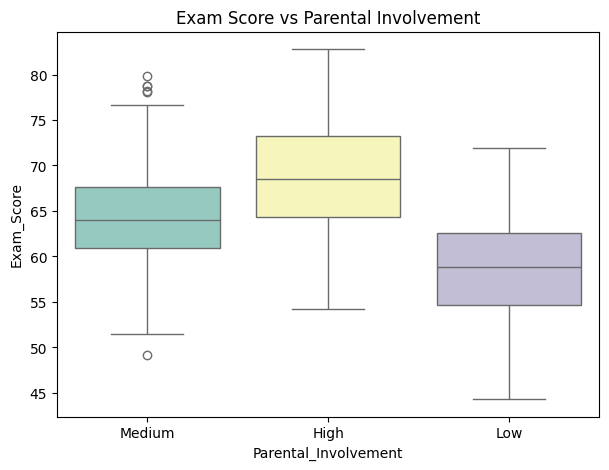


--- Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     70.89
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.63e-70
Time:                        11:01:53   Log-Likelihood:                -1504.6
No. Observations:                 500   AIC:                             3025.
Df Residuals:                     492   BIC:                             3059.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [1]:
# 📘 Create a new categorical dataset and test categorical predictors
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# ---------------------------
# 1️⃣ Create synthetic categorical dataset
# ---------------------------
np.random.seed(42)
n = 500

data_new = pd.DataFrame({
    "Parental_Involvement": np.random.choice(["Low", "Medium", "High"], n, p=[0.3, 0.4, 0.3]),
    "School_Type": np.random.choice(["Public", "Private"], n, p=[0.6, 0.4]),
    "Gender": np.random.choice(["Male", "Female"], n),
    "Parental_Education_Level": np.random.choice(["High School", "College", "Postgraduate"], n, p=[0.4, 0.4, 0.2]),
    "Internet_Access": np.random.choice(["Yes", "No"], n, p=[0.8, 0.2])
})

# Assign base scores with random noise
score = 60 \
        + data_new["Parental_Involvement"].map({"Low": -5, "Medium": 0, "High": +5}) \
        + data_new["School_Type"].map({"Public": 0, "Private": +3}) \
        + data_new["Gender"].map({"Male": 0, "Female": +2}) \
        + data_new["Parental_Education_Level"].map({"High School": 0, "College": +3, "Postgraduate": +6}) \
        + data_new["Internet_Access"].map({"No": -2, "Yes": 0}) \
        + np.random.normal(0, 5, n)  # noise

data_new["Exam_Score"] = score.round(1)

# Save dataset (optional)
data_new.to_csv("CategoricalStudentData.csv", index=False)

print("\n✅ New dataset created: 'CategoricalStudentData.csv'")
print(data_new.head())

# ---------------------------
# 2️⃣ Visualize sample distributions
# ---------------------------
plt.figure(figsize=(7,5))
sns.boxplot(data=data_new, x="Parental_Involvement", y="Exam_Score", palette="Set3")
plt.title("Exam Score vs Parental Involvement")
plt.show()

# ---------------------------
# 3️⃣ Fit ANOVA / Regression model
# ---------------------------
formula = "Exam_Score ~ C(Parental_Involvement) + C(School_Type) + C(Gender) + C(Parental_Education_Level) + C(Internet_Access)"
model = smf.ols(formula, data=data_new).fit()

print("\n--- Regression Summary ---")
print(model.summary())

# ---------------------------
# 4️⃣ ANOVA Table
# ---------------------------
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n--- ANOVA Table ---")
print(anova_table)

# ---------------------------
# 5️⃣ Interpretation
# ---------------------------
alpha = 0.05
significant = anova_table[anova_table["PR(>F)"] < alpha].index.tolist()

print("\n--- Conclusion ---")
if significant:
    print(f"✅ Significant categorical factors: {', '.join(significant)}")
else:
    print("❌ No categorical factor significantly affects Exam_Score (p > 0.05).")

print(f"R-squared: {model.rsquared:.4f}")
